In [254]:
import importlib
import datamanip
importlib.reload(datamanip)

<module 'datamanip' (namespace)>

In [255]:
import torch
from filepath import *
from datamanip.plots import generate_matrix, generate_metrics
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import split_dataset

# Model Selection by number of 9's
### 1. Match 1-1: 0 vs. 7
### 2. Match 2-1: 0/1 vs. 2/3
### 3. Match 2-2: 4/5 vs. 6/7
### 4. Match 3-1: 0 vs. 1
### 5. Match 3-2: 2 vs. 3
### 6. Match 3-3: 4 vs. 5
### 7. Match 3-4: 6 vs. 7



In [256]:
match = "2-2"

In [257]:
if match == "1-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.01
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "2-1":
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 16
elif match == "2-2":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 20
    HIDDEN_DIM = 28
else:
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 64

In [258]:
#Create list of Data objects, each containing the node features, edge indices, and target values
data_list = ThreeFiveDataset(root=dataset_path, match=match)

In [259]:
train_loader, val_loader, test_loader = split_dataset(data_list)

In [260]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(input_dim=NODE_FEATURES, hidden_dim=HIDDEN_DIM, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [261]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [262]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "/booster/" + match + ".pth")

Epoch 1/150, Train Loss: 0.4886
Epoch 1/150, Validation Loss: 0.4201
Best model updated based on validation loss.
Epoch 2/150, Train Loss: 0.4265
Epoch 2/150, Validation Loss: 0.4035
Best model updated based on validation loss.
Epoch 3/150, Train Loss: 0.4125
Epoch 3/150, Validation Loss: 0.4143
No improvement in validation loss for 1 epoch(s).
Epoch 4/150, Train Loss: 0.4065
Epoch 4/150, Validation Loss: 0.3896
Best model updated based on validation loss.
Epoch 5/150, Train Loss: 0.4005
Epoch 5/150, Validation Loss: 0.3740
Best model updated based on validation loss.
Epoch 6/150, Train Loss: 0.3907
Epoch 6/150, Validation Loss: 0.3739
Best model updated based on validation loss.
Epoch 7/150, Train Loss: 0.3940
Epoch 7/150, Validation Loss: 0.3655
Best model updated based on validation loss.
Epoch 8/150, Train Loss: 0.3897
Epoch 8/150, Validation Loss: 0.3775
No improvement in validation loss for 1 epoch(s).
Epoch 9/150, Train Loss: 0.3907
Epoch 9/150, Validation Loss: 0.3782
No improv

([0.48859316660675456,
  0.42650902285237235,
  0.41253589732920254,
  0.4064723360792028,
  0.40051480579823145,
  0.3906698333664858,
  0.3940069955527224,
  0.3896693242921963,
  0.39066453894738595,
  0.3880266134815845,
  0.38786357676673466,
  0.3833029225479379,
  0.3875550513827895,
  0.3843245954932974,
  0.38468188035054096,
  0.38375309371827915,
  0.3816374085505144,
  0.3797385219293871,
  0.3820863651365536,
  0.37805949098604485,
  0.37947753311901017,
  0.3733128465137296,
  0.37159200194248126,
  0.36586587180443264,
  0.36034006069440505,
  0.3563371828737754,
  0.35526042523986584,
  0.3430726291409008,
  0.3526317521892139,
  0.3423783981013659,
  0.3381027379210853,
  0.33886675763856444,
  0.33621076742091793,
  0.32654583443925805,
  0.3202334714767395,
  0.3262226765595307,
  0.31907119802061656,
  0.31288138485064415,
  0.33903149214573874,
  0.3217507058025352,
  0.3155699996996158,
  0.30732566354327606,
  0.31211703897553894,
  0.3093651600139083,
  0.337026

In [263]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "/booster/" + match + ".pth", weights_only=True))

<All keys matched successfully>

In [264]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "/booster/" + match + ".pth")

GAT(
  (conv1): GATConv(10, 28, heads=1)
  (bn1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(28, 14, heads=1)
  (bn2): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=14, out_features=2, bias=True)
)
[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)]
Accuracy: 0.9078


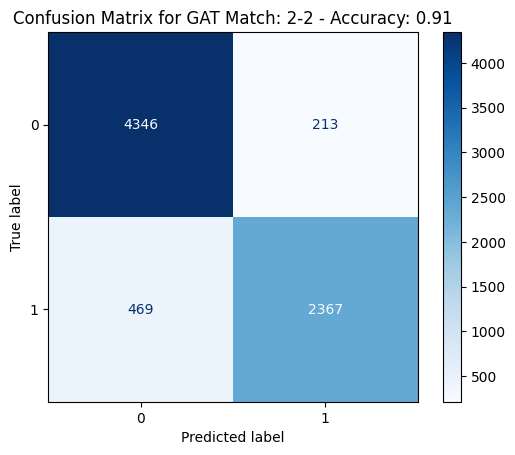

In [265]:
generate_matrix(true_values, predicted_values, accuracy, "GAT Match: "  + match)

In [266]:
generate_metrics(true_values, predicted_values, match, model_checkpoints_path, NUM_EPOCHS, LEARNING_RATE, NODE_FEATURES, DROPOUT_RATE, PATIENCE, HIDDEN_DIM)

Precision: 0.9174
Recall: 0.8346
F1 Score: 0.8741
AUROC: 0.8940
Accuracy: 0.9078
Metrics saved to /Users/einar/Documents/EDISS/Period 1/DIE/ADES-reliability-estimation/src/../models/booster/results/2-2.csv
